## Analysis of Trends in Censored Tweets

In [2]:
%pip install pandas
import pandas as pd

# Load the CSV file
file_path = 'write-folder/tweet_text.csv'
data = pd.read_csv(file_path)

data

--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/Library/

,id,lang,text
0,991433704575852544,en,More photos of police brutality today in Istan...
1,991686033669488640,tr,@Umit_Burcundan Kesinlikle Katılmadığım Bir Fi...
2,991691846731649025,tr,"Hizmet insanları için ""aklını kira verenler"" i..."
3,991102360733745157,tr,Sn. @UVeraTuna hanımefendi vefat eden #EsmaUlu...
4,991694254278959104,tr,"AYM, cezaevinde kitap yasağını hukuka aykırı b..."
...,...,...,...
10229,878729557561540609,en,KDP have jailed 4 SDF fighters on their way fr...
10230,880879882904981504,en,HUNGARY Fights Back Again! PM Viktor Orban to...
10231,880882594124107776,nl,Er is hoop. Maar sluit je aan. https://t.co/lt...
10232,880621803491786752,en,MEDIA BLACKOUT Europe makes it illegal 2 accu...


Censored tweets by language in dataset

--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/Library/

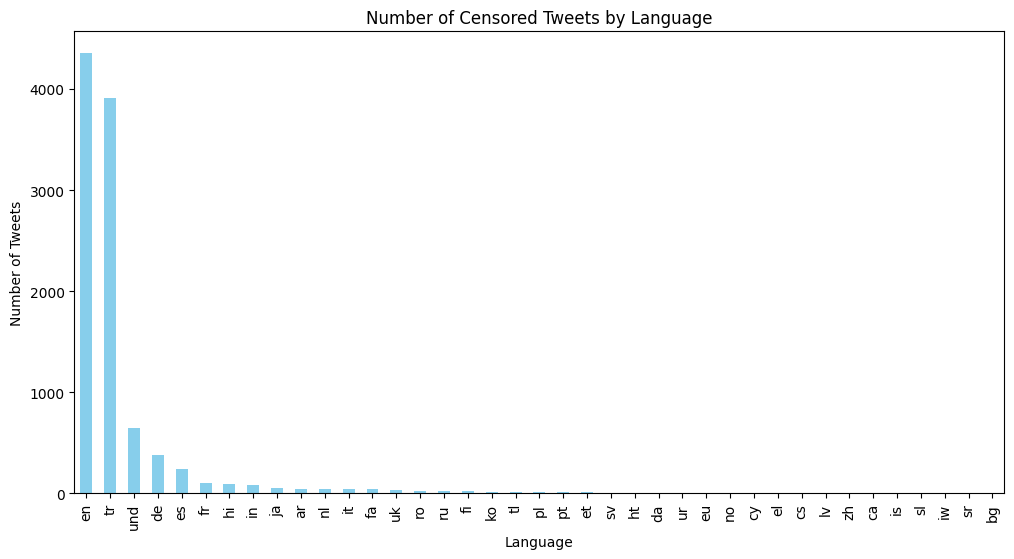

In [10]:
%pip install matplotlib
import matplotlib.pyplot as plt

# Get the counts of each language
lang_counts = data['lang'].value_counts()

# Plot the counts
plt.figure(figsize=(12, 6))
lang_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Language')
plt.ylabel('Number of Tweets')
plt.title('Number of Censored Tweets by Language')
plt.show()



Consider English language tweets only:

In [4]:
english_tweets = data[data['lang'] == 'en']['text']

english_tweets

0        More photos of police brutality today in Istan...
5        "End DACA, unlawful from the get go!'  @POTUS ...
6        You know you’re a Leftist Democrat, when you a...
7        Liberal hate makes them look like jackasses. h...
9        Recently, one of my friends and his son tried ...
                               ...                        
10221    Florida Atlantic University allowed the Muslim...
10222    Wake up Aholes, they r coming for u, leftists,...
10229    KDP have jailed 4 SDF fighters on their way fr...
10230    HUNGARY Fights Back Again!  PM Viktor Orban to...
10232    MEDIA BLACKOUT  Europe makes it illegal 2 accu...
Name: text, Length: 4352, dtype: object

### Topic Modeling

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# TF-IDF Vectorizer to convert text data into numerical data
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(english_tweets)

# Apply NMF for topic modeling with an estimated number of topics
num_topics = 5
nmf_model = NMF(n_components=num_topics, random_state=1)
nmf_model.fit(tfidf)

# Extract the top words for each topic
words = tfidf_vectorizer.get_feature_names_out()
topics = []
for topic_idx, topic in enumerate(nmf_model.components_):
    top_words = [words[i] for i in topic.argsort()[-10:]]
    topics.append(top_words)

topics

[['evil',
  'love',
  'twitter',
  'erdogan',
  'good',
  'new',
  'true',
  'turkish',
  'turkey',
  'https'],
 ['liberated',
  'kurdish',
  'fighters',
  'syria',
  'ypj',
  'twitterkurds',
  'isis',
  'ypg',
  'sdf',
  'raqqa'],
 ['want',
  'jews',
  'trump',
  'islam',
  'muslims',
  'just',
  'don',
  'muslim',
  'like',
  'amp'],
 ['muslim',
  'police',
  'muslims',
  'jaydabf',
  'video',
  'london',
  'terror',
  'attack',
  'goldingbf',
  'follow'],
 ['racist',
  'genocide',
  'race',
  'black',
  'right',
  'man',
  'hate',
  'whites',
  'people',
  'white']]

In [6]:
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')  # to ignore common english words

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


False

Most frequent words across all English censored tweets:

In [7]:
all_text = ' '.join(english_tweets.astype(str))

cleaned_text = re.sub(r'http\S+|[^a-zA-Z\s]', '', all_text)  # remove special characters

words = cleaned_text.lower().split()

stop_words = set(stopwords.words('english'))

filtered_words = [word for word in words if word not in stop_words and word != 'amp']

word_counts = Counter(filtered_words) # Count the frequency of each word

most_common_words = word_counts.most_common(10) # Get the most common words

print(most_common_words)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/ashwatthaphatak/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.10/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.10/share/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.10/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


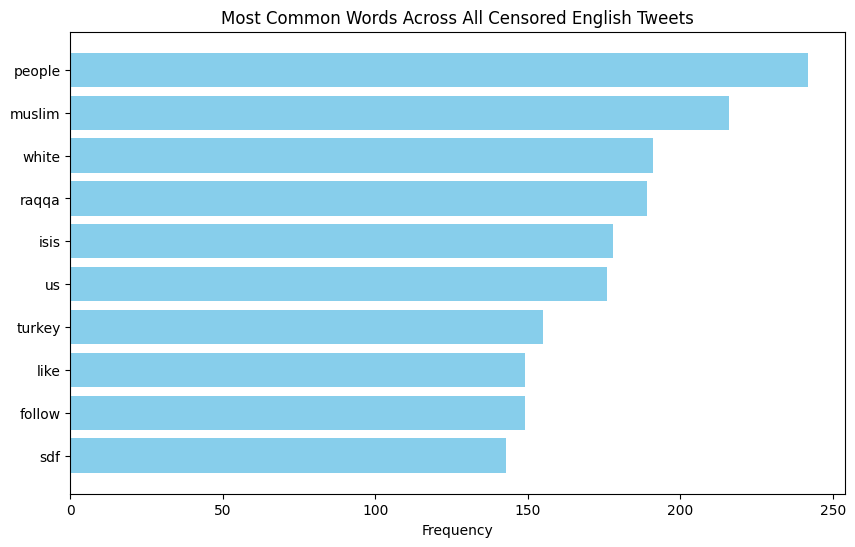

In [ ]:
import matplotlib.pyplot as plt

words_list = []
counts_list = []

for i in most_common_words:
    words, counts = i
    words_list.append(words)
    counts_list.append(counts)

# Plotting the most common words
plt.figure(figsize=(10, 6))
plt.barh(words_list, counts_list, color='skyblue')
plt.xlabel("Frequency")
plt.title("Most Common Words Across All Censored English Tweets")
plt.gca().invert_yaxis()  # to show most frequent word at top
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.tokenize import word_tokenize

nltk.download('punkt')  # pre-trained model in NLTK library used for tokenizing text

documents = english_tweets.astype(str).tolist()

# Preprocess text
stop_words = set(stopwords.words('english'))
processed_docs = []
for doc in documents:
    cleaned_doc = re.sub(r'http\S+|[^a-zA-Z\s]', '', doc)
    # Tokenize and remove stopwords
    tokens = [word for word in word_tokenize(cleaned_doc.lower()) if word not in stop_words and len(word) > 2 and word != 'amp']
    processed_docs.append(' '.join(tokens))

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(processed_docs)

# Perform LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(doc_term_matrix)

# Print topics
for index, topic in enumerate(lda.components_):
    print(f'Topic #{index + 1}:')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ajayc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Topic #1:
['america', 'goldingbf', 'youre', 'muslims', 'follow', 'islam', 'muslim', 'people', 'terror', 'dont']
Topic #2:
['jews', 'islam', 'women', 'turkey', 'police', 'hate', 'turkish', 'white', 'like', 'people']
Topic #3:
['kurds', 'muslim', 'turkey', 'twitterkurds', 'kurdish', 'syria', 'ypg', 'isis', 'sdf', 'raqqa']
Topic #4:
['police', 'day', 'follow', 'like', 'video', 'isis', 'muslims', 'attack', 'muslim', 'london']
Topic #5:
['war', 'hate', 'read', 'trump', 'turkey', 'want', 'time', 'white', 'jews', 'people']


The above 5 topics can be renamed as:
1. 
2. 
3. 
4. 
5. 